In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_72718/2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


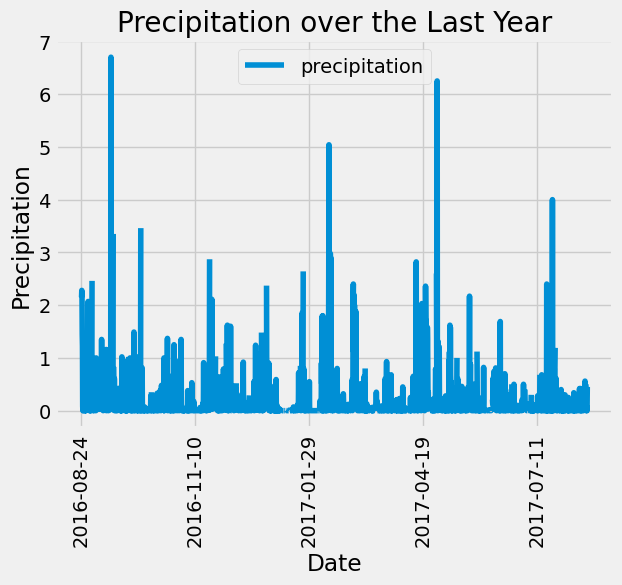

In [17]:
# Perform a query to find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Convert the most recent date to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year from the most recent date
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a pandas DataFrame
precip_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Set the 'date' column as the index
precip_df.set_index('date', inplace=True)

# Sort the DataFrame by date
precip_df = precip_df.sort_index()

# Plot the results
precip_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation over the Last Year")
plt.show()

Text(0, 0.5, 'Inches')

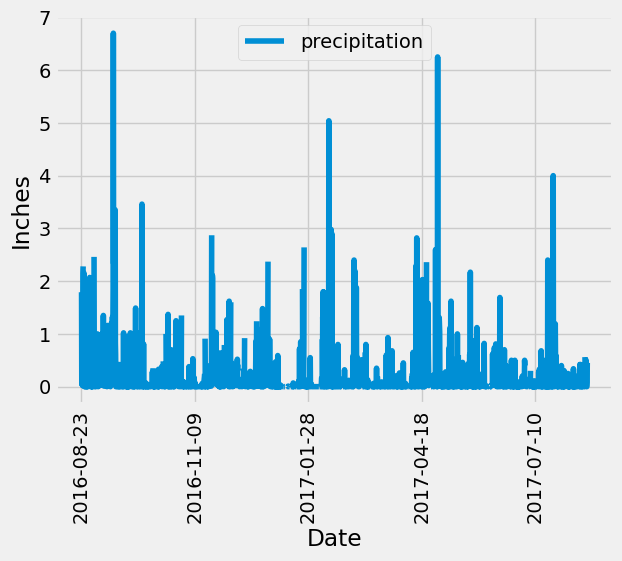

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [18]:
# Query the last 12 months of precipitation data
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Retrieve date and precipitation data for the last year
precip_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Step 2: Convert the query results to a Pandas DataFrame
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

# Step 3: Use Pandas to calculate the summary statistics
summary_stats = precip_df['precipitation'].describe()

# Display the summary statistics
print(summary_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).all()

# Display the total number of stations
print(f"Total number of stations: {total_stations[0][0]}")


Total number of stations: 9


In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [20]:
# Query to find the most active stations and list them in descending order by observation counts
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# Display the most active stations and their counts
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Get the most active station id from the previous query
most_active_station_id = most_active_stations[0][0]  # Taking the first result (most active station)

# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = session.query(
    func.min(Measurement.tobs), 
    func.avg(Measurement.tobs), 
    func.max(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

# Display the temperature stats
min_temp, avg_temp, max_temp = temp_stats[0]
print(f"Station: {most_active_station_id}")
print(f"Lowest Temperature: {min_temp} °F")
print(f"Average Temperature: {avg_temp:.2f} °F")
print(f"Highest Temperature: {max_temp} °F")


Station: USC00519281
Lowest Temperature: 54.0 °F
Average Temperature: 71.66 °F
Highest Temperature: 85.0 °F


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Temperature Observations for Station USC00519281 (Last 12 Months):
[77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0, 80.0, 78.0, 78.0, 78.0, 73.0, 74.0, 80.0, 79.0, 77.0, 80.0, 76.0, 79.0, 75.0, 79.0, 78.0, 79.0, 78.0, 78.0, 76.0, 74.0, 77.0, 78.0, 79.0, 79.0, 77.0, 80.0, 78.0, 78.0, 78.0, 77.0, 79.0, 79.0, 79.0, 79.0, 75.0, 76.0, 73.0, 72.0, 71.0, 77.0, 79.0, 78.0, 79.0, 77.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 77.0, 74.0, 75.0, 76.0, 73.0, 76.0, 74.0, 77.0, 76.0, 76.0, 74.0, 75.0, 75.0, 75.0, 75.0, 71.0, 63.0, 70.0, 68.0, 67.0, 77.0, 74.0, 77.0, 76.0, 76.0, 75.0, 76.0, 75.0, 73.0, 75.0, 73.0, 75.0, 74.0, 75.0, 74.0, 75.0, 73.0, 75.0, 73.0, 73.0, 74.0, 70.0, 72.0, 70.0, 67.0, 67.0, 69.0, 70.0, 68.0, 69.0, 69.0, 66.0, 65.0, 68.0, 62.0, 75.0, 70.0, 69.0, 76.0, 76.0, 74.0, 73.0, 71.0, 74.0, 74.0, 72.0, 71.0, 72.0, 74.0, 69.0, 67.0, 72.0, 70.0, 64.0, 63.0, 63.0, 62.0, 70.0, 70.0, 62.0, 62.0, 63.0, 65.0, 69.0, 77.0, 70.0, 74.0, 69.0, 72.0, 71.0, 69.0, 71.0, 71.0, 72.0, 72.0, 69.0, 70

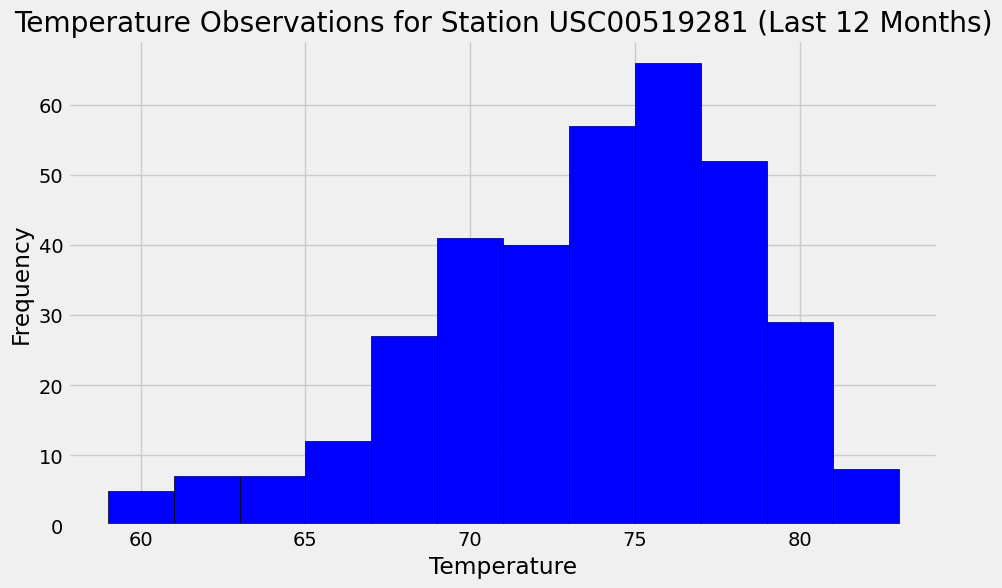

In [24]:
# Get the most active station id from the previous query
most_active_station_id = most_active_stations[0][0]  # Assuming most_active_stations holds the station id list

# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Convert the date string to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the date 12 months ago from the most recent date
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
tobs_last_12_months = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Convert the result into a list
tobs_values = [tob[0] for tob in tobs_last_12_months]

# Print the result to be shown before the plot
print(f"Temperature Observations for Station {most_active_station_id} (Last 12 Months):")
print(tobs_values)

# Plot the temperature observations as a histogram
plt.figure(figsize=(10, 6))
plt.hist(tobs_values, bins=12, color='blue', edgecolor='black')
plt.title(f"Temperature Observations for Station {most_active_station_id} (Last 12 Months)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



Text(0.5, 4.183333333333314, 'Temperature')

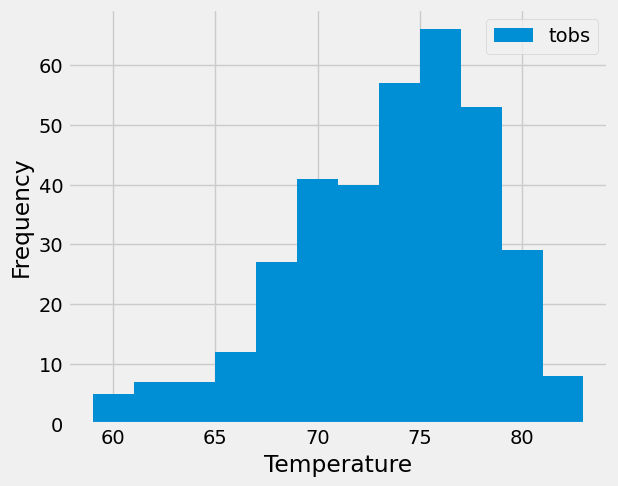

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [25]:
# Close Session
session.close()